[0.601320207118988, 0.627795398235321, 0.642652153968811, 0.657174289226532, 0.5757715702056885, 0.5580477714538574, 0.5427073240280151, 0.6826934814453125, 0.5233935713768005, 0.6312943696975708, 0.5743553042411804, 0.8055953979492188, 0.4044441282749176, 0.8546903729438782, 0.3352086544036865, 0.8368879556655884, 0.3458381593227386, 0.8602175712585449, 0.3213260173797607, 0.8231231570243835, 0.3560941517353058, 0.8045650720596313, 0.3762905895709991, 0.6982381939888, 0.4516806006431579, 0.6788106560707092, 0.4539255499839782, 0.666111946105957, 0.4495510458946228, 0.6714625954627991, 0.4485352635383606, 0.6151371002197266, 0.4747433662414551, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


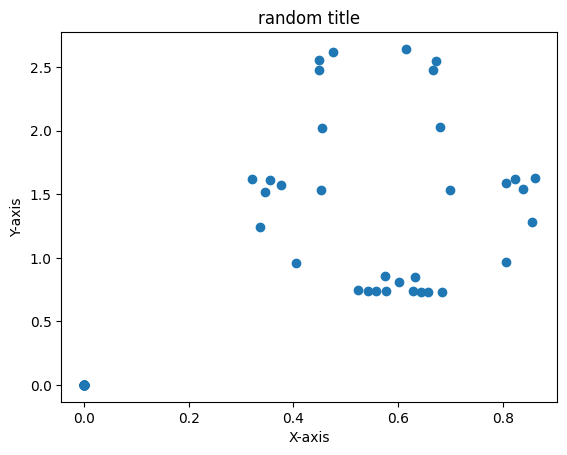

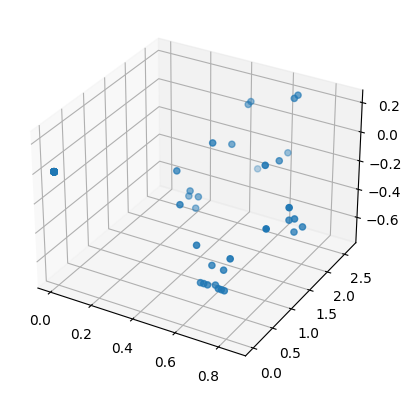

In [9]:
%run data_visualization.ipynb
import statistics

import math

In [10]:
#function returns new x coordinates based on point de fuite chosen
    #!this formula is for point de fuite centered at 0
def projective_geometry(pt_fuite, corrected_x,y):
    new_x = []
    for i in range(len(y)):
        val=corrected_x[i]*(y[i]+pt_fuite[1])/(1*pt_fuite[1])
        new_x.append(val)

    return new_x
        

In [11]:
def projective_geometry_not_centered(pt_fuite, corrected_x,y):
    ax = pt_fuite[0]
    by = pt_fuite[1]

    new_x = []
    for i in range(len(y)):
        slope = -by/(corrected_x[i]-ax)
        x_coord = (y[i]-by*(1+(ax/(corrected_x[i]))))/(slope)
        new_x.append(x_coord)
    return new_x


In [12]:

# def correcting_x(x):
#     correction = find_center(x)
#     # print("The value of the correction is:", correction)
#     corrected_x = []
#     for i in x:
#         corrected_x.append(i-correction)
#         # print(i)
#         # print(i-correction)
#     return corrected_x

In [13]:
#loading my data using the function in the previous file
x = load_data("init_demo.csv")[0]
y = load_data("init_demo.csv")[1]
z = load_data("init_demo.csv")[2]
print(x)
print(y)

[0.601320207118988, 0.627795398235321, 0.642652153968811, 0.657174289226532, 0.5757715702056885, 0.5580477714538574, 0.5427073240280151, 0.6826934814453125, 0.5233935713768005, 0.6312943696975708, 0.5743553042411804, 0.8055953979492188, 0.4044441282749176, 0.8546903729438782, 0.3352086544036865, 0.8368879556655884, 0.3458381593227386, 0.8602175712585449, 0.3213260173797607, 0.8231231570243835, 0.3560941517353058, 0.8045650720596313, 0.3762905895709991, 0.6982381939888, 0.4516806006431579, 0.6788106560707092, 0.4539255499839782, 0.666111946105957, 0.4495510458946228, 0.6714625954627991, 0.4485352635383606, 0.6151371002197266, 0.4747433662414551, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.8066442012786865, 0.7376369833946228, 0.7344911098480225, 0.7314409613609314, 0.7427778840065002, 0.7417225241661072, 0.7403809428215027, 0.734893798828125, 0.7443556189537048, 0.8519324064254761, 0.8607808947563171, 0

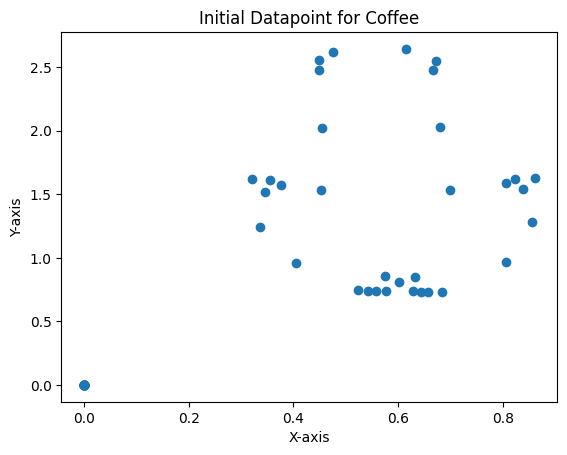

[0, -20]


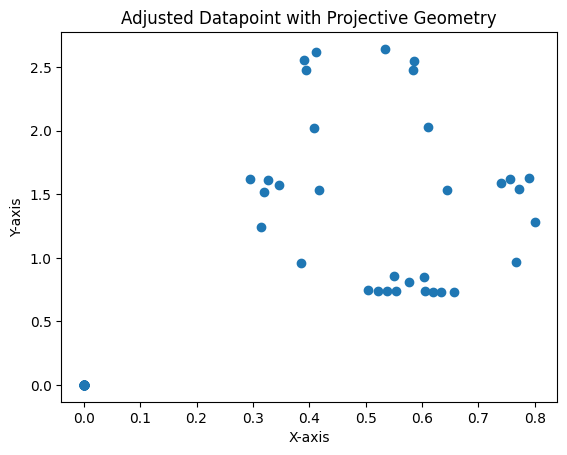

final_x is  [0.601320207118988, 0.627795398235321, 0.642652153968811, 0.657174289226532, 0.5757715702056885, 0.5580477714538574, 0.5427073240280151, 0.6826934814453125, 0.5233935713768005, 0.6312943696975708, 0.5743553042411804, 0.8055953979492188, 0.4044441282749176, 0.8546903729438782, 0.3352086544036865, 0.8368879556655884, 0.3458381593227386, 0.8602175712585449, 0.3213260173797607, 0.8231231570243835, 0.3560941517353058, 0.8045650720596313, 0.3762905895709991, 0.6982381939888, 0.4516806006431579, 0.6788106560707092, 0.4539255499839782, 0.666111946105957, 0.4495510458946228, 0.6714625954627991, 0.4485352635383606, 0.6151371002197266, 0.4747433662414551]


C:\Users\xinle\AppData\Local\Temp\ipykernel_18872\3428055131.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -by/(corrected_x[i]-ax)
C:\Users\xinle\AppData\Local\Temp\ipykernel_18872\3428055131.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  x_coord = (y[i]-by*(1+(ax/(corrected_x[i]))))/(slope)


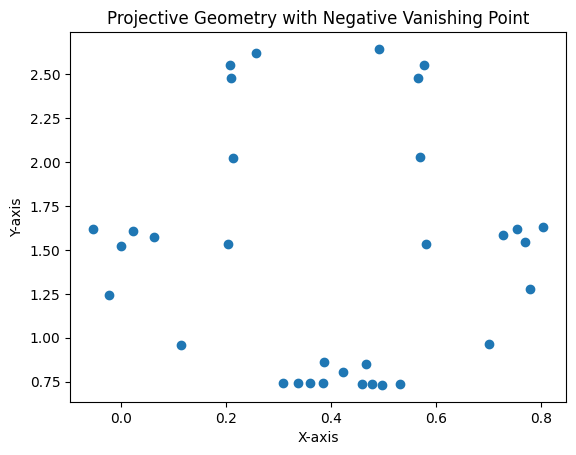

final_x is  [0.601320207118988, 0.627795398235321, 0.642652153968811, 0.657174289226532, 0.5757715702056885, 0.5580477714538574, 0.5427073240280151, 0.6826934814453125, 0.5233935713768005, 0.6312943696975708, 0.5743553042411804, 0.8055953979492188, 0.4044441282749176, 0.8546903729438782, 0.3352086544036865, 0.8368879556655884, 0.3458381593227386, 0.8602175712585449, 0.3213260173797607, 0.8231231570243835, 0.3560941517353058, 0.8045650720596313, 0.3762905895709991, 0.6982381939888, 0.4516806006431579, 0.6788106560707092, 0.4539255499839782, 0.666111946105957, 0.4495510458946228, 0.6714625954627991, 0.4485352635383606, 0.6151371002197266, 0.4747433662414551]


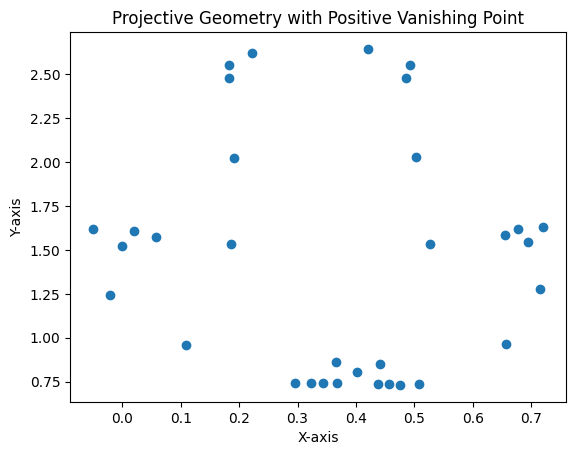

In [16]:
#x,y of point de fuite

points = [[x[i], y[i]] for i in range(len(y))]

#initial
scatter_2d(x,y, title = "Initial Datapoint for Coffee")

#changed
pt_fuite = [0,-20]
new_x = projective_geometry(pt_fuite, x, y)
print(pt_fuite)
scatter_2d(new_x, y, title = "Adjusted Datapoint with Projective Geometry")

#changed, with not centered point de fuite
pt_fuite = [find_center(x),-10]
new_x = projective_geometry_not_centered(pt_fuite, x, y)
scatter_2d(new_x, y, title = "Projective Geometry with Negative Vanishing Point")

#with point de fuite on the top
pt_fuite = [find_center(x),10000]
new_x = projective_geometry_not_centered(pt_fuite, x, y)
scatter_2d(new_x, y, title = "Projective Geometry with Positive Vanishing Point")


